# Set Up

## Mount Google Drive

Ignore if not using Google Collab:

In [1]:
from google.colab import drive

# mount google drive
drive.mount('/content/drive')
%cd /content/drive/My Drive
!git clone https://github.com/FranciscoLozCoding/cooling_with_code.git
%cd cooling_with_code
!git pull

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive
fatal: destination path 'cooling_with_code' already exists and is not an empty directory.
/content/drive/My Drive/cooling_with_code
Already up to date.


## Import Libraries

In [3]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#data science
import pandas as pd
import numpy as np
from scipy.stats import skew

#custom tools
from tools.environment import VALID_SPLIT, RANDOM_STATE
from tools.feature_selection import load_and_prepare_data
from tools.outlier import univariate_outlier_analysis

## Import Datasets

In [12]:
#load in datasets
raw = pd.read_csv('data/train/150m_buffer_dataset.csv')

# Preprocessing

This notebook is for applying what we learned in [04_EDA](/04_EDA.ipynb) to our dataset. For details on the train/test dataset refer to our past notebooks:
- [01_dataset_generation](/01_dataset_generation.ipynb)
- [02_more_dataset_generation](/02_more_dataset_generation.ipynb)

Like stated in [04_EDA](/04_EDA.ipynb) we will only move forward with 150m Buffer dataset.

>NOTE: Most of the discovery was done in [04_EDA](/04_EDA.ipynb). This notebook will be more about applying the solutions.

In [13]:
#copy dataset, for editing
dataset = raw.copy()

## Eliminating Skewness

Here we will apply `boxcox` to the features that are skewed. To quantify skewness we will use `skew` from scipy.

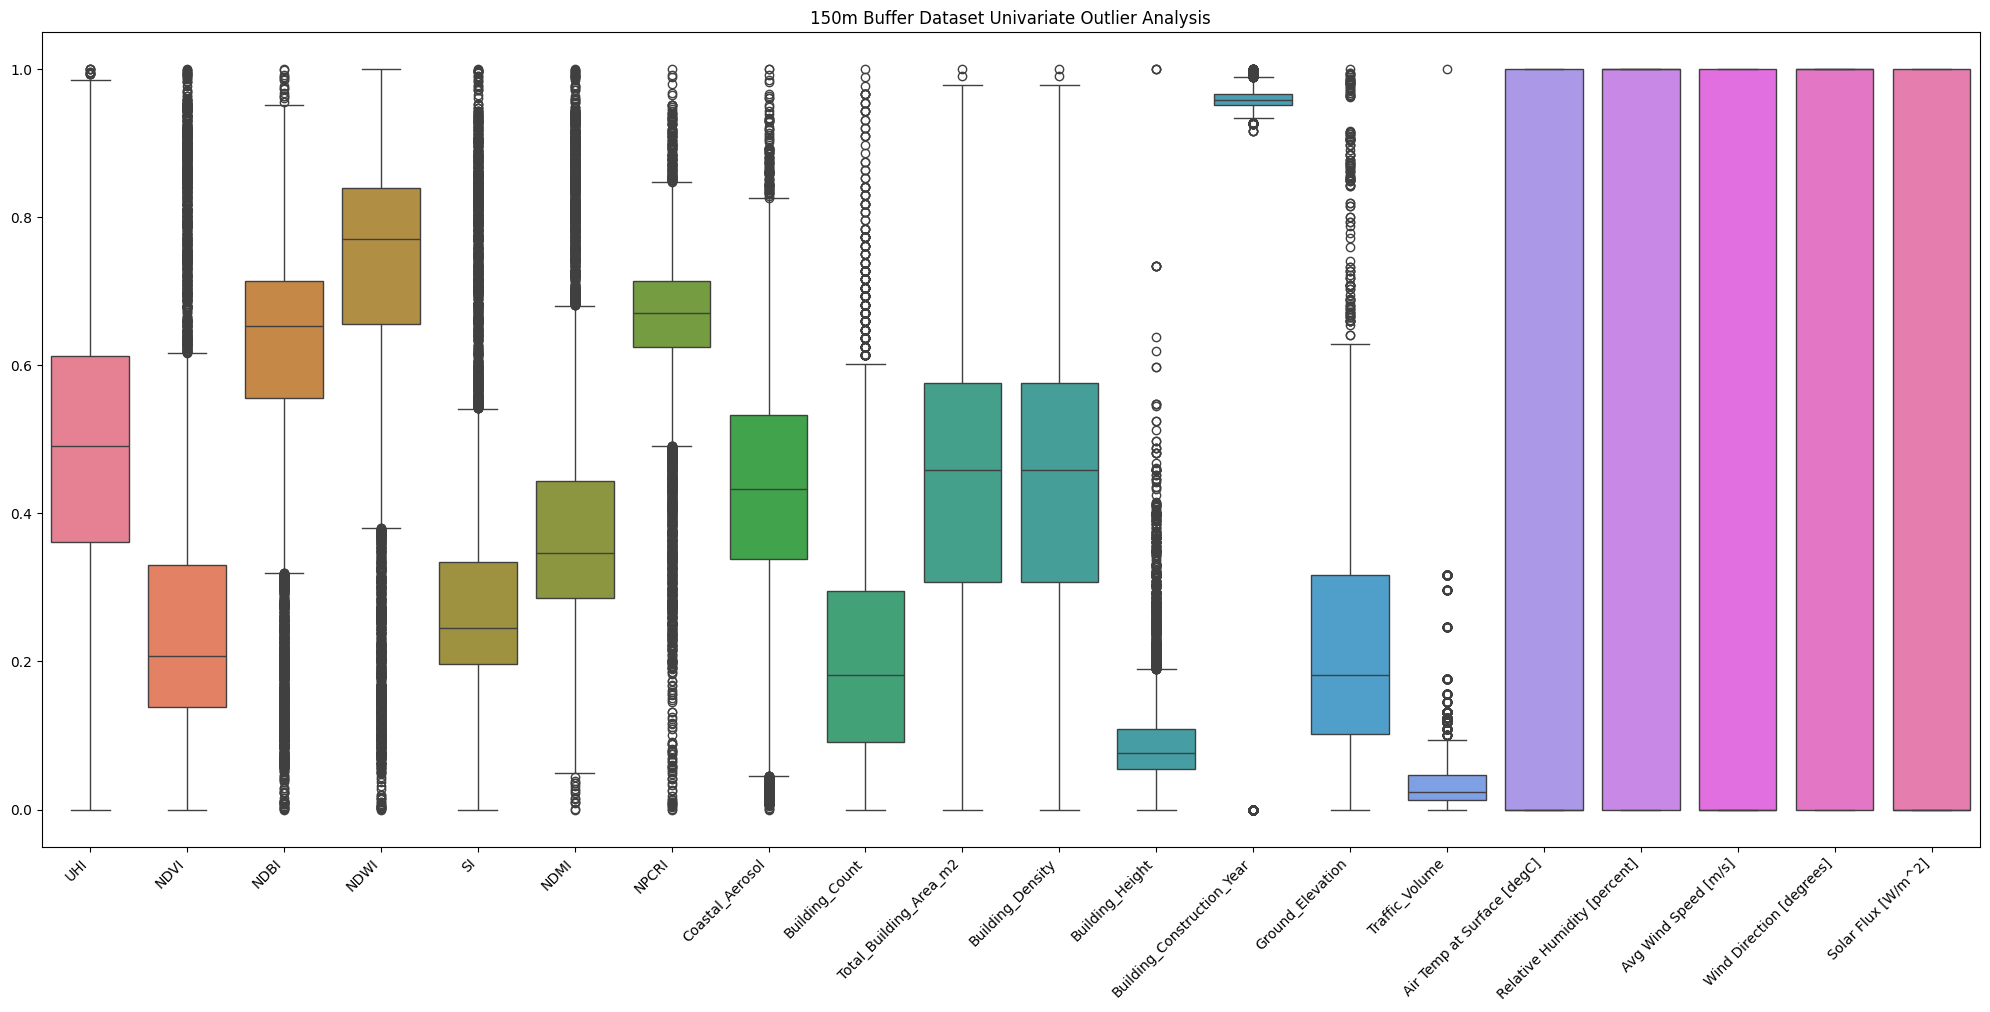

Skewness:
UHI 0.02547868830397157
NDVI 1.6526902876126073
NDBI -1.4827062386658678
NDWI -1.5852149541201723
SI 1.8589549113074508
NDMI 1.4827062386658678
NPCRI -1.873896858056594
Coastal_Aerosol -0.179109193172529
Building_Count 1.1175154228932345
Total_Building_Area_m2 -0.3726511224744114
Building_Density -0.37265112247425647
Building_Height 3.0912555603146687
Building_Construction_Year -4.194051292599821
Ground_Elevation 1.2297725331474192
Traffic_Volume 4.449539602489311
Air Temp at Surface [degC] 0.35696492405418956
Relative Humidity [percent] -0.3569649240542103
Avg Wind Speed [m/s] 0.3569649240541931
Wind Direction [degrees] -0.3569649240542005
Solar Flux [W/m^2] 0.35696492405417385


In [9]:
univariate_outlier_analysis(dataset, "150m Buffer Dataset")
print("Skewness:")
for col in dataset.columns:
    print(col, skew(dataset[col]))

Here we can see what variables are skewed (ex; NDBI) and the skew score.

# Conclusion

>TODO: Create the function that will apply everything in this notebook to the dataset that is passed through.